## Evaluating tuned machine classifier

Using Cross Validitation we will check the following evaluation metrics:


* ROC curve and AUC
* Confusion Matrix
* Classification Report
* Precision, Recall and F1 scores

First of all to make comparison and evaluate our trained model, we need to make predictions.

In [72]:
# Make predictions with best tuned model
y_preds = rs_cat.predict(X_test)
y_preds.shape

(6513,)

### ROC curve: comparing the true positive rates to false positive


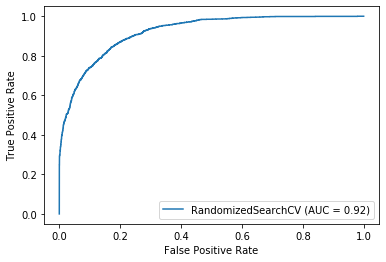

In [73]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_cat,
              X_test,
              y_test)

### Confusion matrix:

Will give us a performance measurement for the machine learning classification problem we are analysing. Let's create now a function to plot this matrix using Seaborn Heatmap.

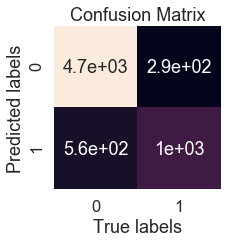

In [74]:
sns.set(font_scale=1.5)

# Create a function to plot a nice looking confusion matrix
def plot_conf_mat(y_tes, y_preds):
    """
    Plots a nice looking confusion matrix
    
    y_test: true data labels
    y_preds: predicted labels on X_test set
    
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.title('Confusion Matrix')

plot_conf_mat(y_test, y_preds)

Now that Confusion Matrix, ROC curve and AUC analysis are completed, the evaluation process can move on to Classification report. Precision, recall and F1 will be one by one examined  

### Classification Report

In [75]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.89      0.94      0.92      4942
           2       0.78      0.64      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.86      0.87      0.87      6513



* This classificationreport has been done only on 1 data test split 
* Therefore next step will be to consider each parameter individually on a multiple set of data (Cross VAlidation on 5 folds) 

### Calculate evaluation metrics using Cross Validation

* Calculate Precision, Recall and F1 score on a cross validate data set (using scoring parameter with 5 folds)

In [76]:
rs_cat.best_params_

{'max_leaves': 40,
 'learning_rate': 0.3,
 'iterations': 200,
 'grow_policy': 'Lossguide',
 'depth': 4}

In [77]:
best_model = CatBoostClassifier(max_leaves=40,
                                learning_rate=0.3,
                               iterations=200,
                                grow_policy='Lossguide',
                                depth=4)

In [78]:
# Cross Validated accuracy
cv_acc = cross_val_score(best_model,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc_mean = np.mean(cv_acc)
cv_acc_mean

0:	learn: 0.4910390	total: 38.4ms	remaining: 7.63s
1:	learn: 0.4094957	total: 79ms	remaining: 7.82s
2:	learn: 0.3694131	total: 116ms	remaining: 7.65s
3:	learn: 0.3505391	total: 154ms	remaining: 7.54s
4:	learn: 0.3391372	total: 192ms	remaining: 7.47s
5:	learn: 0.3327239	total: 231ms	remaining: 7.46s
6:	learn: 0.3262649	total: 307ms	remaining: 8.46s
7:	learn: 0.3187783	total: 354ms	remaining: 8.48s
8:	learn: 0.3136945	total: 394ms	remaining: 8.35s
9:	learn: 0.3113021	total: 437ms	remaining: 8.31s
10:	learn: 0.3081480	total: 514ms	remaining: 8.84s
11:	learn: 0.3056354	total: 563ms	remaining: 8.82s
12:	learn: 0.3020594	total: 605ms	remaining: 8.71s
13:	learn: 0.2993112	total: 644ms	remaining: 8.55s
14:	learn: 0.2973829	total: 701ms	remaining: 8.65s
15:	learn: 0.2934693	total: 763ms	remaining: 8.77s
16:	learn: 0.2924421	total: 806ms	remaining: 8.67s
17:	learn: 0.2915134	total: 854ms	remaining: 8.63s
18:	learn: 0.2903485	total: 927ms	remaining: 8.83s
19:	learn: 0.2896061	total: 988ms	remaini

161:	learn: 0.2290253	total: 10.3s	remaining: 2.42s
162:	learn: 0.2288107	total: 10.4s	remaining: 2.35s
163:	learn: 0.2285343	total: 10.4s	remaining: 2.29s
164:	learn: 0.2284223	total: 10.5s	remaining: 2.23s
165:	learn: 0.2281667	total: 10.6s	remaining: 2.17s
166:	learn: 0.2278998	total: 10.6s	remaining: 2.1s
167:	learn: 0.2275107	total: 10.7s	remaining: 2.05s
168:	learn: 0.2272013	total: 10.8s	remaining: 1.99s
169:	learn: 0.2270592	total: 10.9s	remaining: 1.92s
170:	learn: 0.2269358	total: 10.9s	remaining: 1.85s
171:	learn: 0.2266104	total: 11s	remaining: 1.79s
172:	learn: 0.2263648	total: 11s	remaining: 1.72s
173:	learn: 0.2261102	total: 11.1s	remaining: 1.65s
174:	learn: 0.2258385	total: 11.1s	remaining: 1.59s
175:	learn: 0.2255843	total: 11.2s	remaining: 1.52s
176:	learn: 0.2252919	total: 11.2s	remaining: 1.46s
177:	learn: 0.2250407	total: 11.2s	remaining: 1.39s
178:	learn: 0.2247510	total: 11.3s	remaining: 1.32s
179:	learn: 0.2244622	total: 11.3s	remaining: 1.26s
180:	learn: 0.224

123:	learn: 0.2411942	total: 7.56s	remaining: 4.63s
124:	learn: 0.2408634	total: 7.61s	remaining: 4.57s
125:	learn: 0.2407461	total: 7.71s	remaining: 4.53s
126:	learn: 0.2404338	total: 7.76s	remaining: 4.46s
127:	learn: 0.2400488	total: 7.83s	remaining: 4.41s
128:	learn: 0.2396984	total: 7.97s	remaining: 4.39s
129:	learn: 0.2393968	total: 8.03s	remaining: 4.32s
130:	learn: 0.2392224	total: 8.09s	remaining: 4.26s
131:	learn: 0.2389273	total: 8.14s	remaining: 4.19s
132:	learn: 0.2388540	total: 8.2s	remaining: 4.13s
133:	learn: 0.2387392	total: 8.25s	remaining: 4.06s
134:	learn: 0.2385877	total: 8.29s	remaining: 3.99s
135:	learn: 0.2384826	total: 8.33s	remaining: 3.92s
136:	learn: 0.2383555	total: 8.38s	remaining: 3.85s
137:	learn: 0.2382372	total: 8.51s	remaining: 3.82s
138:	learn: 0.2381184	total: 8.66s	remaining: 3.8s
139:	learn: 0.2378536	total: 8.73s	remaining: 3.74s
140:	learn: 0.2375947	total: 8.8s	remaining: 3.68s
141:	learn: 0.2374298	total: 8.86s	remaining: 3.62s
142:	learn: 0.2

84:	learn: 0.2522913	total: 5.18s	remaining: 7s
85:	learn: 0.2519001	total: 5.25s	remaining: 6.96s
86:	learn: 0.2513308	total: 5.33s	remaining: 6.92s
87:	learn: 0.2508407	total: 5.39s	remaining: 6.86s
88:	learn: 0.2506509	total: 5.45s	remaining: 6.8s
89:	learn: 0.2501783	total: 5.51s	remaining: 6.74s
90:	learn: 0.2500411	total: 5.56s	remaining: 6.66s
91:	learn: 0.2495824	total: 5.6s	remaining: 6.58s
92:	learn: 0.2490950	total: 5.66s	remaining: 6.51s
93:	learn: 0.2488926	total: 5.71s	remaining: 6.43s
94:	learn: 0.2484046	total: 5.75s	remaining: 6.35s
95:	learn: 0.2481794	total: 5.79s	remaining: 6.27s
96:	learn: 0.2479094	total: 5.83s	remaining: 6.19s
97:	learn: 0.2474333	total: 5.9s	remaining: 6.14s
98:	learn: 0.2472361	total: 5.95s	remaining: 6.07s
99:	learn: 0.2471621	total: 5.99s	remaining: 5.99s
100:	learn: 0.2467285	total: 6.05s	remaining: 5.93s
101:	learn: 0.2464162	total: 6.14s	remaining: 5.89s
102:	learn: 0.2463307	total: 6.21s	remaining: 5.85s
103:	learn: 0.2461855	total: 6.27s

45:	learn: 0.2695278	total: 2.6s	remaining: 8.71s
46:	learn: 0.2688921	total: 2.67s	remaining: 8.68s
47:	learn: 0.2683755	total: 2.71s	remaining: 8.59s
48:	learn: 0.2677664	total: 2.75s	remaining: 8.48s
49:	learn: 0.2667065	total: 2.8s	remaining: 8.39s
50:	learn: 0.2662464	total: 2.87s	remaining: 8.38s
51:	learn: 0.2654807	total: 2.91s	remaining: 8.28s
52:	learn: 0.2648874	total: 2.98s	remaining: 8.26s
53:	learn: 0.2641305	total: 3.04s	remaining: 8.22s
54:	learn: 0.2639816	total: 3.1s	remaining: 8.16s
55:	learn: 0.2633510	total: 3.13s	remaining: 8.06s
56:	learn: 0.2627696	total: 3.17s	remaining: 7.96s
57:	learn: 0.2623309	total: 3.21s	remaining: 7.86s
58:	learn: 0.2621535	total: 3.28s	remaining: 7.83s
59:	learn: 0.2616692	total: 3.34s	remaining: 7.8s
60:	learn: 0.2614644	total: 3.39s	remaining: 7.72s
61:	learn: 0.2608377	total: 3.44s	remaining: 7.66s
62:	learn: 0.2603753	total: 3.49s	remaining: 7.59s
63:	learn: 0.2600076	total: 3.57s	remaining: 7.58s
64:	learn: 0.2598489	total: 3.63s	r

5:	learn: 0.3311381	total: 305ms	remaining: 9.86s
6:	learn: 0.3264056	total: 351ms	remaining: 9.67s
7:	learn: 0.3226739	total: 389ms	remaining: 9.33s
8:	learn: 0.3180068	total: 428ms	remaining: 9.08s
9:	learn: 0.3148788	total: 500ms	remaining: 9.49s
10:	learn: 0.3091801	total: 538ms	remaining: 9.24s
11:	learn: 0.3064734	total: 577ms	remaining: 9.03s
12:	learn: 0.3023545	total: 614ms	remaining: 8.84s
13:	learn: 0.3001431	total: 665ms	remaining: 8.84s
14:	learn: 0.2985010	total: 705ms	remaining: 8.7s
15:	learn: 0.2971947	total: 751ms	remaining: 8.64s
16:	learn: 0.2958124	total: 797ms	remaining: 8.58s
17:	learn: 0.2948482	total: 851ms	remaining: 8.61s
18:	learn: 0.2941997	total: 903ms	remaining: 8.61s
19:	learn: 0.2923554	total: 945ms	remaining: 8.5s
20:	learn: 0.2916510	total: 992ms	remaining: 8.45s
21:	learn: 0.2881631	total: 1.07s	remaining: 8.64s
22:	learn: 0.2866951	total: 1.13s	remaining: 8.68s
23:	learn: 0.2860071	total: 1.18s	remaining: 8.68s
24:	learn: 0.2852350	total: 1.25s	rema

168:	learn: 0.2293266	total: 11.2s	remaining: 2.05s
169:	learn: 0.2290105	total: 11.2s	remaining: 1.98s
170:	learn: 0.2285586	total: 11.3s	remaining: 1.91s
171:	learn: 0.2281991	total: 11.3s	remaining: 1.84s
172:	learn: 0.2279406	total: 11.4s	remaining: 1.77s
173:	learn: 0.2276911	total: 11.4s	remaining: 1.71s
174:	learn: 0.2275774	total: 11.4s	remaining: 1.64s
175:	learn: 0.2273200	total: 11.5s	remaining: 1.57s
176:	learn: 0.2270139	total: 11.5s	remaining: 1.5s
177:	learn: 0.2267032	total: 11.6s	remaining: 1.43s
178:	learn: 0.2264038	total: 11.6s	remaining: 1.36s
179:	learn: 0.2261705	total: 11.7s	remaining: 1.3s
180:	learn: 0.2259577	total: 11.7s	remaining: 1.23s
181:	learn: 0.2256149	total: 11.7s	remaining: 1.16s
182:	learn: 0.2254915	total: 11.8s	remaining: 1.1s
183:	learn: 0.2253312	total: 11.8s	remaining: 1.03s
184:	learn: 0.2251864	total: 11.9s	remaining: 964ms
185:	learn: 0.2250303	total: 11.9s	remaining: 898ms
186:	learn: 0.2248906	total: 12s	remaining: 833ms
187:	learn: 0.224

0.8683702383552683

In [79]:
# Cross Validated precision
cv_prec = cross_val_score(best_model,
                        X,
                        y,
                        cv=5,
                        scoring='precision')
cv_prec_mean = np.mean(cv_prec)
cv_prec_mean

0:	learn: 0.4910390	total: 44ms	remaining: 8.75s
1:	learn: 0.4094957	total: 89.2ms	remaining: 8.83s
2:	learn: 0.3694131	total: 141ms	remaining: 9.27s
3:	learn: 0.3505391	total: 182ms	remaining: 8.9s
4:	learn: 0.3391372	total: 220ms	remaining: 8.57s
5:	learn: 0.3327239	total: 287ms	remaining: 9.28s
6:	learn: 0.3262649	total: 348ms	remaining: 9.6s
7:	learn: 0.3187783	total: 387ms	remaining: 9.28s
8:	learn: 0.3136945	total: 429ms	remaining: 9.11s
9:	learn: 0.3113021	total: 503ms	remaining: 9.56s
10:	learn: 0.3081480	total: 545ms	remaining: 9.36s
11:	learn: 0.3056354	total: 580ms	remaining: 9.08s
12:	learn: 0.3020594	total: 617ms	remaining: 8.87s
13:	learn: 0.2993112	total: 678ms	remaining: 9.01s
14:	learn: 0.2973829	total: 734ms	remaining: 9.06s
15:	learn: 0.2934693	total: 777ms	remaining: 8.94s
16:	learn: 0.2924421	total: 825ms	remaining: 8.88s
17:	learn: 0.2915134	total: 879ms	remaining: 8.89s
18:	learn: 0.2903485	total: 937ms	remaining: 8.93s
19:	learn: 0.2896061	total: 996ms	remaining

161:	learn: 0.2290253	total: 9.08s	remaining: 2.13s
162:	learn: 0.2288107	total: 9.12s	remaining: 2.07s
163:	learn: 0.2285343	total: 9.15s	remaining: 2.01s
164:	learn: 0.2284223	total: 9.19s	remaining: 1.95s
165:	learn: 0.2281667	total: 9.27s	remaining: 1.9s
166:	learn: 0.2278998	total: 9.31s	remaining: 1.84s
167:	learn: 0.2275107	total: 9.35s	remaining: 1.78s
168:	learn: 0.2272013	total: 9.39s	remaining: 1.72s
169:	learn: 0.2270592	total: 9.45s	remaining: 1.67s
170:	learn: 0.2269358	total: 9.48s	remaining: 1.61s
171:	learn: 0.2266104	total: 9.52s	remaining: 1.55s
172:	learn: 0.2263648	total: 9.56s	remaining: 1.49s
173:	learn: 0.2261102	total: 9.63s	remaining: 1.44s
174:	learn: 0.2258385	total: 9.67s	remaining: 1.38s
175:	learn: 0.2255843	total: 9.71s	remaining: 1.32s
176:	learn: 0.2252919	total: 9.74s	remaining: 1.27s
177:	learn: 0.2250407	total: 9.79s	remaining: 1.21s
178:	learn: 0.2247510	total: 9.84s	remaining: 1.15s
179:	learn: 0.2244622	total: 9.89s	remaining: 1.1s
180:	learn: 0.

125:	learn: 0.2407461	total: 6.46s	remaining: 3.79s
126:	learn: 0.2404338	total: 6.52s	remaining: 3.75s
127:	learn: 0.2400488	total: 6.56s	remaining: 3.69s
128:	learn: 0.2396984	total: 6.6s	remaining: 3.63s
129:	learn: 0.2393968	total: 6.64s	remaining: 3.58s
130:	learn: 0.2392224	total: 6.71s	remaining: 3.53s
131:	learn: 0.2389273	total: 6.74s	remaining: 3.47s
132:	learn: 0.2388540	total: 6.79s	remaining: 3.42s
133:	learn: 0.2387392	total: 6.85s	remaining: 3.37s
134:	learn: 0.2385877	total: 6.93s	remaining: 3.34s
135:	learn: 0.2384826	total: 6.97s	remaining: 3.28s
136:	learn: 0.2383555	total: 7.01s	remaining: 3.22s
137:	learn: 0.2382372	total: 7.04s	remaining: 3.17s
138:	learn: 0.2381184	total: 7.11s	remaining: 3.12s
139:	learn: 0.2378536	total: 7.15s	remaining: 3.06s
140:	learn: 0.2375947	total: 7.18s	remaining: 3s
141:	learn: 0.2374298	total: 7.22s	remaining: 2.95s
142:	learn: 0.2371343	total: 7.27s	remaining: 2.9s
143:	learn: 0.2369157	total: 7.33s	remaining: 2.85s
144:	learn: 0.236

87:	learn: 0.2508407	total: 4.53s	remaining: 5.76s
88:	learn: 0.2506509	total: 4.57s	remaining: 5.69s
89:	learn: 0.2501783	total: 4.6s	remaining: 5.63s
90:	learn: 0.2500411	total: 4.64s	remaining: 5.56s
91:	learn: 0.2495824	total: 4.78s	remaining: 5.61s
92:	learn: 0.2490950	total: 4.89s	remaining: 5.63s
93:	learn: 0.2488926	total: 4.93s	remaining: 5.56s
94:	learn: 0.2484046	total: 4.97s	remaining: 5.49s
95:	learn: 0.2481794	total: 5.03s	remaining: 5.45s
96:	learn: 0.2479094	total: 5.07s	remaining: 5.38s
97:	learn: 0.2474333	total: 5.11s	remaining: 5.32s
98:	learn: 0.2472361	total: 5.15s	remaining: 5.25s
99:	learn: 0.2471621	total: 5.2s	remaining: 5.2s
100:	learn: 0.2467285	total: 5.25s	remaining: 5.15s
101:	learn: 0.2464162	total: 5.29s	remaining: 5.08s
102:	learn: 0.2463307	total: 5.33s	remaining: 5.02s
103:	learn: 0.2461855	total: 5.37s	remaining: 4.96s
104:	learn: 0.2459343	total: 5.43s	remaining: 4.91s
105:	learn: 0.2456722	total: 5.48s	remaining: 4.86s
106:	learn: 0.2453904	total:

48:	learn: 0.2677664	total: 2.47s	remaining: 7.62s
49:	learn: 0.2667065	total: 2.51s	remaining: 7.54s
50:	learn: 0.2662464	total: 2.56s	remaining: 7.47s
51:	learn: 0.2654807	total: 2.59s	remaining: 7.38s
52:	learn: 0.2648874	total: 2.67s	remaining: 7.4s
53:	learn: 0.2641305	total: 2.71s	remaining: 7.31s
54:	learn: 0.2639816	total: 2.74s	remaining: 7.23s
55:	learn: 0.2633510	total: 2.79s	remaining: 7.16s
56:	learn: 0.2627696	total: 2.84s	remaining: 7.13s
57:	learn: 0.2623309	total: 2.88s	remaining: 7.06s
58:	learn: 0.2621535	total: 2.93s	remaining: 6.99s
59:	learn: 0.2616692	total: 2.97s	remaining: 6.93s
60:	learn: 0.2614644	total: 3.04s	remaining: 6.92s
61:	learn: 0.2608377	total: 3.07s	remaining: 6.84s
62:	learn: 0.2603753	total: 3.12s	remaining: 6.78s
63:	learn: 0.2600076	total: 3.16s	remaining: 6.71s
64:	learn: 0.2598489	total: 3.21s	remaining: 6.67s
65:	learn: 0.2593307	total: 3.25s	remaining: 6.61s
66:	learn: 0.2591688	total: 3.29s	remaining: 6.54s
67:	learn: 0.2586332	total: 3.33

8:	learn: 0.3180068	total: 535ms	remaining: 11.4s
9:	learn: 0.3148788	total: 651ms	remaining: 12.4s
10:	learn: 0.3091801	total: 740ms	remaining: 12.7s
11:	learn: 0.3064734	total: 820ms	remaining: 12.9s
12:	learn: 0.3023545	total: 903ms	remaining: 13s
13:	learn: 0.3001431	total: 977ms	remaining: 13s
14:	learn: 0.2985010	total: 1.03s	remaining: 12.8s
15:	learn: 0.2971947	total: 1.09s	remaining: 12.5s
16:	learn: 0.2958124	total: 1.19s	remaining: 12.8s
17:	learn: 0.2948482	total: 1.25s	remaining: 12.7s
18:	learn: 0.2941997	total: 1.33s	remaining: 12.7s
19:	learn: 0.2923554	total: 1.43s	remaining: 12.8s
20:	learn: 0.2916510	total: 1.49s	remaining: 12.7s
21:	learn: 0.2881631	total: 1.54s	remaining: 12.4s
22:	learn: 0.2866951	total: 1.58s	remaining: 12.2s
23:	learn: 0.2860071	total: 1.74s	remaining: 12.8s
24:	learn: 0.2852350	total: 1.87s	remaining: 13.1s
25:	learn: 0.2848705	total: 1.94s	remaining: 13s
26:	learn: 0.2844211	total: 2.03s	remaining: 13s
27:	learn: 0.2837306	total: 2.1s	remainin

169:	learn: 0.2290105	total: 12.1s	remaining: 2.14s
170:	learn: 0.2285586	total: 12.2s	remaining: 2.08s
171:	learn: 0.2281991	total: 12.4s	remaining: 2.02s
172:	learn: 0.2279406	total: 12.5s	remaining: 1.95s
173:	learn: 0.2276911	total: 12.6s	remaining: 1.89s
174:	learn: 0.2275774	total: 12.7s	remaining: 1.82s
175:	learn: 0.2273200	total: 12.8s	remaining: 1.75s
176:	learn: 0.2270139	total: 13s	remaining: 1.69s
177:	learn: 0.2267032	total: 13.1s	remaining: 1.62s
178:	learn: 0.2264038	total: 13.2s	remaining: 1.55s
179:	learn: 0.2261705	total: 13.3s	remaining: 1.48s
180:	learn: 0.2259577	total: 13.4s	remaining: 1.4s
181:	learn: 0.2256149	total: 13.4s	remaining: 1.32s
182:	learn: 0.2254915	total: 13.5s	remaining: 1.25s
183:	learn: 0.2253312	total: 13.5s	remaining: 1.18s
184:	learn: 0.2251864	total: 13.6s	remaining: 1.1s
185:	learn: 0.2250303	total: 13.7s	remaining: 1.03s
186:	learn: 0.2248906	total: 13.7s	remaining: 955ms
187:	learn: 0.2246735	total: 13.9s	remaining: 886ms
188:	learn: 0.22

0.896072019379617

In [80]:
# Cross validated recall
cv_recall = cross_val_score(best_model,
                        X,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0:	learn: 0.4910390	total: 70.4ms	remaining: 14s
1:	learn: 0.4094957	total: 423ms	remaining: 41.9s
2:	learn: 0.3694131	total: 597ms	remaining: 39.2s
3:	learn: 0.3505391	total: 689ms	remaining: 33.8s
4:	learn: 0.3391372	total: 758ms	remaining: 29.6s
5:	learn: 0.3327239	total: 871ms	remaining: 28.2s
6:	learn: 0.3262649	total: 929ms	remaining: 25.6s
7:	learn: 0.3187783	total: 1.01s	remaining: 24.2s
8:	learn: 0.3136945	total: 1.06s	remaining: 22.5s
9:	learn: 0.3113021	total: 1.11s	remaining: 21s
10:	learn: 0.3081480	total: 1.16s	remaining: 19.9s
11:	learn: 0.3056354	total: 1.24s	remaining: 19.4s
12:	learn: 0.3020594	total: 1.28s	remaining: 18.4s
13:	learn: 0.2993112	total: 1.32s	remaining: 17.5s
14:	learn: 0.2973829	total: 1.35s	remaining: 16.7s
15:	learn: 0.2934693	total: 1.43s	remaining: 16.5s
16:	learn: 0.2924421	total: 1.48s	remaining: 15.9s
17:	learn: 0.2915134	total: 1.52s	remaining: 15.3s
18:	learn: 0.2903485	total: 1.56s	remaining: 14.8s
19:	learn: 0.2896061	total: 1.63s	remaining:

161:	learn: 0.2290253	total: 11.9s	remaining: 2.79s
162:	learn: 0.2288107	total: 12s	remaining: 2.72s
163:	learn: 0.2285343	total: 12.1s	remaining: 2.65s
164:	learn: 0.2284223	total: 12.2s	remaining: 2.58s
165:	learn: 0.2281667	total: 12.2s	remaining: 2.51s
166:	learn: 0.2278998	total: 12.4s	remaining: 2.45s
167:	learn: 0.2275107	total: 12.5s	remaining: 2.38s
168:	learn: 0.2272013	total: 12.5s	remaining: 2.3s
169:	learn: 0.2270592	total: 12.6s	remaining: 2.22s
170:	learn: 0.2269358	total: 12.7s	remaining: 2.15s
171:	learn: 0.2266104	total: 12.7s	remaining: 2.08s
172:	learn: 0.2263648	total: 12.8s	remaining: 2s
173:	learn: 0.2261102	total: 12.8s	remaining: 1.92s
174:	learn: 0.2258385	total: 12.9s	remaining: 1.84s
175:	learn: 0.2255843	total: 13s	remaining: 1.77s
176:	learn: 0.2252919	total: 13s	remaining: 1.69s
177:	learn: 0.2250407	total: 13s	remaining: 1.61s
178:	learn: 0.2247510	total: 13.1s	remaining: 1.53s
179:	learn: 0.2244622	total: 13.2s	remaining: 1.46s
180:	learn: 0.2243807	to

123:	learn: 0.2411942	total: 7.56s	remaining: 4.63s
124:	learn: 0.2408634	total: 7.64s	remaining: 4.58s
125:	learn: 0.2407461	total: 7.7s	remaining: 4.52s
126:	learn: 0.2404338	total: 7.75s	remaining: 4.45s
127:	learn: 0.2400488	total: 7.81s	remaining: 4.39s
128:	learn: 0.2396984	total: 8s	remaining: 4.4s
129:	learn: 0.2393968	total: 8.06s	remaining: 4.34s
130:	learn: 0.2392224	total: 8.09s	remaining: 4.26s
131:	learn: 0.2389273	total: 8.14s	remaining: 4.19s
132:	learn: 0.2388540	total: 8.18s	remaining: 4.12s
133:	learn: 0.2387392	total: 8.23s	remaining: 4.05s
134:	learn: 0.2385877	total: 8.29s	remaining: 3.99s
135:	learn: 0.2384826	total: 8.32s	remaining: 3.92s
136:	learn: 0.2383555	total: 8.36s	remaining: 3.85s
137:	learn: 0.2382372	total: 8.4s	remaining: 3.77s
138:	learn: 0.2381184	total: 8.44s	remaining: 3.7s
139:	learn: 0.2378536	total: 8.5s	remaining: 3.64s
140:	learn: 0.2375947	total: 8.55s	remaining: 3.58s
141:	learn: 0.2374298	total: 8.59s	remaining: 3.51s
142:	learn: 0.237134

84:	learn: 0.2522913	total: 4.58s	remaining: 6.19s
85:	learn: 0.2519001	total: 4.64s	remaining: 6.15s
86:	learn: 0.2513308	total: 4.68s	remaining: 6.08s
87:	learn: 0.2508407	total: 4.8s	remaining: 6.12s
88:	learn: 0.2506509	total: 4.89s	remaining: 6.09s
89:	learn: 0.2501783	total: 4.93s	remaining: 6.02s
90:	learn: 0.2500411	total: 4.97s	remaining: 5.96s
91:	learn: 0.2495824	total: 5.02s	remaining: 5.89s
92:	learn: 0.2490950	total: 5.08s	remaining: 5.85s
93:	learn: 0.2488926	total: 5.12s	remaining: 5.78s
94:	learn: 0.2484046	total: 5.18s	remaining: 5.73s
95:	learn: 0.2481794	total: 5.24s	remaining: 5.67s
96:	learn: 0.2479094	total: 5.28s	remaining: 5.61s
97:	learn: 0.2474333	total: 5.32s	remaining: 5.54s
98:	learn: 0.2472361	total: 5.36s	remaining: 5.47s
99:	learn: 0.2471621	total: 5.4s	remaining: 5.4s
100:	learn: 0.2467285	total: 5.45s	remaining: 5.34s
101:	learn: 0.2464162	total: 5.5s	remaining: 5.29s
102:	learn: 0.2463307	total: 5.54s	remaining: 5.22s
103:	learn: 0.2461855	total: 5.5

47:	learn: 0.2683755	total: 2.72s	remaining: 8.63s
48:	learn: 0.2677664	total: 2.76s	remaining: 8.52s
49:	learn: 0.2667065	total: 2.81s	remaining: 8.42s
50:	learn: 0.2662464	total: 2.98s	remaining: 8.71s
51:	learn: 0.2654807	total: 3.06s	remaining: 8.71s
52:	learn: 0.2648874	total: 3.1s	remaining: 8.61s
53:	learn: 0.2641305	total: 3.14s	remaining: 8.49s
54:	learn: 0.2639816	total: 3.18s	remaining: 8.38s
55:	learn: 0.2633510	total: 3.24s	remaining: 8.34s
56:	learn: 0.2627696	total: 3.29s	remaining: 8.24s
57:	learn: 0.2623309	total: 3.32s	remaining: 8.14s
58:	learn: 0.2621535	total: 3.36s	remaining: 8.04s
59:	learn: 0.2616692	total: 3.41s	remaining: 7.95s
60:	learn: 0.2614644	total: 3.48s	remaining: 7.92s
61:	learn: 0.2608377	total: 3.52s	remaining: 7.83s
62:	learn: 0.2603753	total: 3.56s	remaining: 7.74s
63:	learn: 0.2600076	total: 3.61s	remaining: 7.67s
64:	learn: 0.2598489	total: 3.67s	remaining: 7.63s
65:	learn: 0.2593307	total: 3.73s	remaining: 7.57s
66:	learn: 0.2591688	total: 3.77

8:	learn: 0.3180068	total: 499ms	remaining: 10.6s
9:	learn: 0.3148788	total: 580ms	remaining: 11s
10:	learn: 0.3091801	total: 644ms	remaining: 11.1s
11:	learn: 0.3064734	total: 684ms	remaining: 10.7s
12:	learn: 0.3023545	total: 750ms	remaining: 10.8s
13:	learn: 0.3001431	total: 787ms	remaining: 10.5s
14:	learn: 0.2985010	total: 848ms	remaining: 10.5s
15:	learn: 0.2971947	total: 930ms	remaining: 10.7s
16:	learn: 0.2958124	total: 990ms	remaining: 10.7s
17:	learn: 0.2948482	total: 1.03s	remaining: 10.4s
18:	learn: 0.2941997	total: 1.09s	remaining: 10.4s
19:	learn: 0.2923554	total: 1.18s	remaining: 10.6s
20:	learn: 0.2916510	total: 1.25s	remaining: 10.7s
21:	learn: 0.2881631	total: 1.32s	remaining: 10.7s
22:	learn: 0.2866951	total: 1.37s	remaining: 10.6s
23:	learn: 0.2860071	total: 1.44s	remaining: 10.5s
24:	learn: 0.2852350	total: 1.49s	remaining: 10.4s
25:	learn: 0.2848705	total: 1.53s	remaining: 10.2s
26:	learn: 0.2844211	total: 1.57s	remaining: 10s
27:	learn: 0.2837306	total: 1.63s	rem

169:	learn: 0.2290105	total: 10.7s	remaining: 1.88s
170:	learn: 0.2285586	total: 10.7s	remaining: 1.82s
171:	learn: 0.2281991	total: 10.9s	remaining: 1.77s
172:	learn: 0.2279406	total: 10.9s	remaining: 1.71s
173:	learn: 0.2276911	total: 11s	remaining: 1.64s
174:	learn: 0.2275774	total: 11s	remaining: 1.58s
175:	learn: 0.2273200	total: 11.1s	remaining: 1.51s
176:	learn: 0.2270139	total: 11.1s	remaining: 1.45s
177:	learn: 0.2267032	total: 11.2s	remaining: 1.38s
178:	learn: 0.2264038	total: 11.2s	remaining: 1.32s
179:	learn: 0.2261705	total: 11.3s	remaining: 1.25s
180:	learn: 0.2259577	total: 11.3s	remaining: 1.19s
181:	learn: 0.2256149	total: 11.4s	remaining: 1.13s
182:	learn: 0.2254915	total: 11.5s	remaining: 1.07s
183:	learn: 0.2253312	total: 11.6s	remaining: 1.01s
184:	learn: 0.2251864	total: 11.6s	remaining: 943ms
185:	learn: 0.2250303	total: 11.7s	remaining: 880ms
186:	learn: 0.2248906	total: 11.8s	remaining: 817ms
187:	learn: 0.2246735	total: 11.8s	remaining: 753ms
188:	learn: 0.22

0.9350728155339805

In [81]:
# Cross Validated f1
cv_f1 = cross_val_score(best_model,
                        X,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1_mean = np.mean(cv_f1)
cv_f1_mean

0:	learn: 0.4910390	total: 43.3ms	remaining: 8.61s
1:	learn: 0.4094957	total: 135ms	remaining: 13.3s
2:	learn: 0.3694131	total: 291ms	remaining: 19.1s
3:	learn: 0.3505391	total: 410ms	remaining: 20.1s
4:	learn: 0.3391372	total: 477ms	remaining: 18.6s
5:	learn: 0.3327239	total: 546ms	remaining: 17.7s
6:	learn: 0.3262649	total: 613ms	remaining: 16.9s
7:	learn: 0.3187783	total: 684ms	remaining: 16.4s
8:	learn: 0.3136945	total: 758ms	remaining: 16.1s
9:	learn: 0.3113021	total: 831ms	remaining: 15.8s
10:	learn: 0.3081480	total: 880ms	remaining: 15.1s
11:	learn: 0.3056354	total: 918ms	remaining: 14.4s
12:	learn: 0.3020594	total: 989ms	remaining: 14.2s
13:	learn: 0.2993112	total: 1.06s	remaining: 14s
14:	learn: 0.2973829	total: 1.11s	remaining: 13.7s
15:	learn: 0.2934693	total: 1.21s	remaining: 13.9s
16:	learn: 0.2924421	total: 1.27s	remaining: 13.7s
17:	learn: 0.2915134	total: 1.33s	remaining: 13.5s
18:	learn: 0.2903485	total: 1.38s	remaining: 13.1s
19:	learn: 0.2896061	total: 1.44s	remainin

164:	learn: 0.2284223	total: 10.5s	remaining: 2.23s
165:	learn: 0.2281667	total: 10.6s	remaining: 2.17s
166:	learn: 0.2278998	total: 10.6s	remaining: 2.1s
167:	learn: 0.2275107	total: 10.7s	remaining: 2.03s
168:	learn: 0.2272013	total: 10.7s	remaining: 1.97s
169:	learn: 0.2270592	total: 10.8s	remaining: 1.9s
170:	learn: 0.2269358	total: 10.8s	remaining: 1.83s
171:	learn: 0.2266104	total: 10.8s	remaining: 1.77s
172:	learn: 0.2263648	total: 10.9s	remaining: 1.71s
173:	learn: 0.2261102	total: 11s	remaining: 1.64s
174:	learn: 0.2258385	total: 11.1s	remaining: 1.58s
175:	learn: 0.2255843	total: 11.2s	remaining: 1.52s
176:	learn: 0.2252919	total: 11.2s	remaining: 1.46s
177:	learn: 0.2250407	total: 11.4s	remaining: 1.41s
178:	learn: 0.2247510	total: 11.5s	remaining: 1.35s
179:	learn: 0.2244622	total: 11.6s	remaining: 1.29s
180:	learn: 0.2243807	total: 11.7s	remaining: 1.23s
181:	learn: 0.2243464	total: 11.8s	remaining: 1.17s
182:	learn: 0.2242004	total: 11.9s	remaining: 1.11s
183:	learn: 0.22

125:	learn: 0.2407461	total: 8.42s	remaining: 4.94s
126:	learn: 0.2404338	total: 8.5s	remaining: 4.88s
127:	learn: 0.2400488	total: 8.54s	remaining: 4.8s
128:	learn: 0.2396984	total: 8.63s	remaining: 4.75s
129:	learn: 0.2393968	total: 8.7s	remaining: 4.68s
130:	learn: 0.2392224	total: 8.75s	remaining: 4.61s
131:	learn: 0.2389273	total: 8.82s	remaining: 4.54s
132:	learn: 0.2388540	total: 8.88s	remaining: 4.47s
133:	learn: 0.2387392	total: 8.95s	remaining: 4.41s
134:	learn: 0.2385877	total: 9.01s	remaining: 4.34s
135:	learn: 0.2384826	total: 9.08s	remaining: 4.27s
136:	learn: 0.2383555	total: 9.16s	remaining: 4.21s
137:	learn: 0.2382372	total: 9.2s	remaining: 4.13s
138:	learn: 0.2381184	total: 9.29s	remaining: 4.08s
139:	learn: 0.2378536	total: 9.37s	remaining: 4.02s
140:	learn: 0.2375947	total: 9.44s	remaining: 3.95s
141:	learn: 0.2374298	total: 9.5s	remaining: 3.88s
142:	learn: 0.2371343	total: 9.62s	remaining: 3.83s
143:	learn: 0.2369157	total: 9.81s	remaining: 3.81s
144:	learn: 0.236

88:	learn: 0.2506509	total: 5.85s	remaining: 7.3s
89:	learn: 0.2501783	total: 5.9s	remaining: 7.22s
90:	learn: 0.2500411	total: 5.94s	remaining: 7.12s
91:	learn: 0.2495824	total: 5.99s	remaining: 7.03s
92:	learn: 0.2490950	total: 6.02s	remaining: 6.93s
93:	learn: 0.2488926	total: 6.06s	remaining: 6.84s
94:	learn: 0.2484046	total: 6.13s	remaining: 6.78s
95:	learn: 0.2481794	total: 6.17s	remaining: 6.69s
96:	learn: 0.2479094	total: 6.22s	remaining: 6.61s
97:	learn: 0.2474333	total: 6.28s	remaining: 6.53s
98:	learn: 0.2472361	total: 6.33s	remaining: 6.46s
99:	learn: 0.2471621	total: 6.52s	remaining: 6.52s
100:	learn: 0.2467285	total: 6.57s	remaining: 6.44s
101:	learn: 0.2464162	total: 6.61s	remaining: 6.35s
102:	learn: 0.2463307	total: 6.65s	remaining: 6.26s
103:	learn: 0.2461855	total: 6.69s	remaining: 6.18s
104:	learn: 0.2459343	total: 6.76s	remaining: 6.12s
105:	learn: 0.2456722	total: 6.82s	remaining: 6.05s
106:	learn: 0.2453904	total: 6.86s	remaining: 5.96s
107:	learn: 0.2450109	tota

48:	learn: 0.2677664	total: 6.03s	remaining: 18.6s
49:	learn: 0.2667065	total: 6.21s	remaining: 18.6s
50:	learn: 0.2662464	total: 6.39s	remaining: 18.7s
51:	learn: 0.2654807	total: 6.49s	remaining: 18.5s
52:	learn: 0.2648874	total: 6.62s	remaining: 18.4s
53:	learn: 0.2641305	total: 6.69s	remaining: 18.1s
54:	learn: 0.2639816	total: 6.74s	remaining: 17.8s
55:	learn: 0.2633510	total: 6.8s	remaining: 17.5s
56:	learn: 0.2627696	total: 7s	remaining: 17.6s
57:	learn: 0.2623309	total: 7.12s	remaining: 17.4s
58:	learn: 0.2621535	total: 7.18s	remaining: 17.2s
59:	learn: 0.2616692	total: 7.28s	remaining: 17s
60:	learn: 0.2614644	total: 7.34s	remaining: 16.7s
61:	learn: 0.2608377	total: 7.44s	remaining: 16.6s
62:	learn: 0.2603753	total: 7.52s	remaining: 16.3s
63:	learn: 0.2600076	total: 7.58s	remaining: 16.1s
64:	learn: 0.2598489	total: 7.66s	remaining: 15.9s
65:	learn: 0.2593307	total: 7.75s	remaining: 15.7s
66:	learn: 0.2591688	total: 7.81s	remaining: 15.5s
67:	learn: 0.2586332	total: 7.89s	rem

9:	learn: 0.3148788	total: 536ms	remaining: 10.2s
10:	learn: 0.3091801	total: 605ms	remaining: 10.4s
11:	learn: 0.3064734	total: 792ms	remaining: 12.4s
12:	learn: 0.3023545	total: 877ms	remaining: 12.6s
13:	learn: 0.3001431	total: 926ms	remaining: 12.3s
14:	learn: 0.2985010	total: 977ms	remaining: 12.1s
15:	learn: 0.2971947	total: 1.03s	remaining: 11.9s
16:	learn: 0.2958124	total: 1.08s	remaining: 11.6s
17:	learn: 0.2948482	total: 1.12s	remaining: 11.4s
18:	learn: 0.2941997	total: 1.17s	remaining: 11.1s
19:	learn: 0.2923554	total: 1.26s	remaining: 11.4s
20:	learn: 0.2916510	total: 1.31s	remaining: 11.2s
21:	learn: 0.2881631	total: 1.37s	remaining: 11.1s
22:	learn: 0.2866951	total: 1.45s	remaining: 11.2s
23:	learn: 0.2860071	total: 1.54s	remaining: 11.3s
24:	learn: 0.2852350	total: 1.6s	remaining: 11.2s
25:	learn: 0.2848705	total: 1.67s	remaining: 11.2s
26:	learn: 0.2844211	total: 1.71s	remaining: 10.9s
27:	learn: 0.2837306	total: 1.76s	remaining: 10.8s
28:	learn: 0.2819126	total: 1.84s

172:	learn: 0.2279406	total: 11.3s	remaining: 1.77s
173:	learn: 0.2276911	total: 11.4s	remaining: 1.7s
174:	learn: 0.2275774	total: 11.4s	remaining: 1.63s
175:	learn: 0.2273200	total: 11.5s	remaining: 1.56s
176:	learn: 0.2270139	total: 11.5s	remaining: 1.5s
177:	learn: 0.2267032	total: 11.6s	remaining: 1.43s
178:	learn: 0.2264038	total: 11.6s	remaining: 1.36s
179:	learn: 0.2261705	total: 11.7s	remaining: 1.3s
180:	learn: 0.2259577	total: 11.8s	remaining: 1.24s
181:	learn: 0.2256149	total: 12s	remaining: 1.18s
182:	learn: 0.2254915	total: 12s	remaining: 1.12s
183:	learn: 0.2253312	total: 12.1s	remaining: 1.05s
184:	learn: 0.2251864	total: 12.1s	remaining: 982ms
185:	learn: 0.2250303	total: 12.2s	remaining: 915ms
186:	learn: 0.2248906	total: 12.2s	remaining: 850ms
187:	learn: 0.2246735	total: 12.3s	remaining: 783ms
188:	learn: 0.2244055	total: 12.3s	remaining: 717ms
189:	learn: 0.2241687	total: 12.4s	remaining: 651ms
190:	learn: 0.2240734	total: 12.4s	remaining: 586ms
191:	learn: 0.22371

0.9151547436751372

   Accuracy  Precision    Recall        F1
0   0.86837   0.896072  0.935073  0.915155


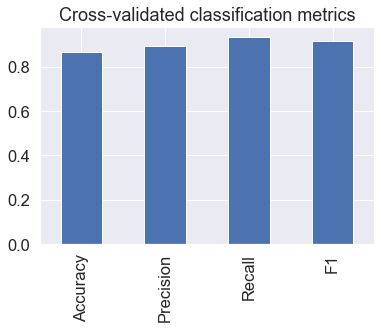

In [82]:
# Print and visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc_mean,
                           'Precision': cv_prec_mean,
                           'Recall': cv_recall_mean,
                           'F1': cv_f1_mean},
                     index=[0])
print(cv_metrics)

cv_metrics.T.plot(kind='bar',
                  title='Cross-validated classification metrics',
                 legend=False);

## Feature importance

Feature importance means asking 'which feature contributes the most to the outcomes of the model and how did they contribute?'. Let's have a look to the `best_model` feature importance:

In [80]:
# Use the model that gave use best results in term of accuracy: Catboost RandomizedSearchCV
best_model.fit(X_train, y_train)

0:	learn: 0.4908682	total: 67.3ms	remaining: 13.4s
1:	learn: 0.4194458	total: 124ms	remaining: 12.3s
2:	learn: 0.3751819	total: 179ms	remaining: 11.8s
3:	learn: 0.3589593	total: 232ms	remaining: 11.4s
4:	learn: 0.3434688	total: 293ms	remaining: 11.4s
5:	learn: 0.3350108	total: 367ms	remaining: 11.9s
6:	learn: 0.3269599	total: 448ms	remaining: 12.4s
7:	learn: 0.3216840	total: 531ms	remaining: 12.7s
8:	learn: 0.3173441	total: 593ms	remaining: 12.6s
9:	learn: 0.3108165	total: 632ms	remaining: 12s
10:	learn: 0.3077728	total: 668ms	remaining: 11.5s
11:	learn: 0.3052361	total: 733ms	remaining: 11.5s
12:	learn: 0.3031423	total: 894ms	remaining: 12.9s
13:	learn: 0.3019613	total: 959ms	remaining: 12.7s
14:	learn: 0.3006387	total: 1.03s	remaining: 12.7s
15:	learn: 0.2996452	total: 1.11s	remaining: 12.8s
16:	learn: 0.2977942	total: 1.17s	remaining: 12.6s
17:	learn: 0.2967146	total: 1.22s	remaining: 12.3s
18:	learn: 0.2957479	total: 1.29s	remaining: 12.3s
19:	learn: 0.2947436	total: 1.38s	remainin

161:	learn: 0.2316377	total: 8.95s	remaining: 2.1s
162:	learn: 0.2314334	total: 8.99s	remaining: 2.04s
163:	learn: 0.2313030	total: 9.02s	remaining: 1.98s
164:	learn: 0.2311225	total: 9.06s	remaining: 1.92s
165:	learn: 0.2309912	total: 9.1s	remaining: 1.86s
166:	learn: 0.2308625	total: 9.15s	remaining: 1.81s
167:	learn: 0.2305396	total: 9.19s	remaining: 1.75s
168:	learn: 0.2302674	total: 9.23s	remaining: 1.69s
169:	learn: 0.2300108	total: 9.26s	remaining: 1.63s
170:	learn: 0.2297815	total: 9.32s	remaining: 1.58s
171:	learn: 0.2296689	total: 9.4s	remaining: 1.53s
172:	learn: 0.2294944	total: 9.51s	remaining: 1.48s
173:	learn: 0.2292393	total: 9.58s	remaining: 1.43s
174:	learn: 0.2288646	total: 9.62s	remaining: 1.37s
175:	learn: 0.2287578	total: 9.66s	remaining: 1.32s
176:	learn: 0.2283487	total: 9.73s	remaining: 1.26s
177:	learn: 0.2282617	total: 9.79s	remaining: 1.21s
178:	learn: 0.2279401	total: 9.83s	remaining: 1.15s
179:	learn: 0.2276728	total: 9.88s	remaining: 1.1s
180:	learn: 0.22

In [88]:
# Check best_model feature importance
best_model_feat = best_model.get_feature_importance()
best_model_feat

array([12.77346334,  1.26775709,  3.03356217,  1.60932448,  9.1973369 ,
        6.29882262,  4.28403262, 20.63580089,  0.51955146,  1.93768995,
       24.05957824,  6.98890236,  6.23397512,  1.16020277,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [87]:
feature_dict = dict(zip(df1.columns, list(best_model_feat)))
feature_dict

{'age': 12.773463343340515,
 'workclass': 1.2677570866024819,
 'fnlwgt': 3.0335621686238783,
 'education': 1.6093244759602983,
 'education_num': 9.197336901375511,
 'marital_status': 6.298822620267535,
 'occupation': 4.284032615564992,
 'relationship': 20.635800887267987,
 'race': 0.5195514618713597,
 'sex': 1.937689951593869,
 'capital_gain': 24.059578238300766,
 'capital_loss': 6.98890235877965,
 'hours_per_week': 6.233975119875873,
 'native_country': 1.1602027705752926,
 'class': 0.0,
 'workclass_is_missing': 0.0,
 'education_is_missing': 0.0,
 'marital_status_is_missing': 0.0,
 'occupation_is_missing': 0.0,
 'relationship_is_missing': 0.0,
 'race_is_missing': 0.0,
 'sex_is_missing': 0.0,
 'native_country_is_missing': 0.0}

<Figure size 720x432 with 0 Axes>

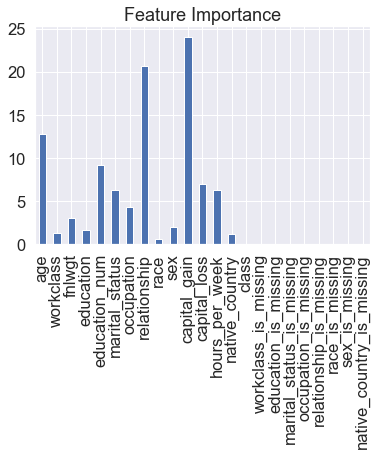

In [90]:
# Plot the feature importance on a barplot
plt.figure(figsize=(10,6))
feat_df = pd.DataFrame(feature_dict, index=[0])
feat_df.T.plot(kind='bar', title='Feature Importance', legend=False);

## Conclusions

* We achieved the initial goal of 90% Accuracy with the CatBoost Classifier tuned with RandomizedSearchCV


* From the classification report we got extremely good results in terms of Recall and F1 (both over 90%); good the Precision too with a score of almost 90%; slightly negative note comes from the Accuracy which decrased when calculated on 5 different CV folds.


* From the Feature Importance analysis we can infer that most influencing features to predict whether a person might belong to the `>50K` or `<50K` classes are: `capital_gain`, `relationship`, `age` and `education_num`. 

